# Classification with Logistic Regression and SVM

Project: [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

Objective: To predict whether a passenger survived or not.

## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data
Read the train dataset in to a pandas dataframe

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head() # Overview the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data
We can use the heatmap functionality of seaborn to see where we are missing data.

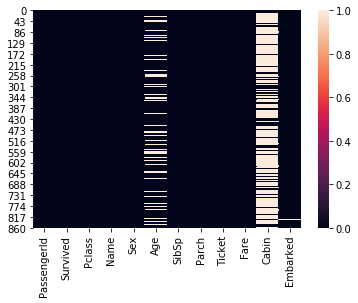

In [3]:
sns.heatmap(df.isna())

The heatmap shows that 'Age' and 'Cabin' columns have missing values, 'Cabin' having more values missing than available.

In [4]:
df.describe(include='all') # Let's take a look at the stats of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Douglas, Mr. Walter Donald",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


It can be seen from 'count' stat that all columns have 891 items except 'Age', 'Cabin', and 'Embarked'(only 2 missing). 

Let's analyse our target variable using histogram and the seaborn.countplot function. 

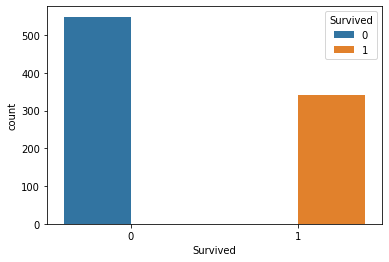

In [5]:
surv_histo = sns.countplot(x='Survived', hue='Survived', data=df)

Let's see the target variable based on gender.

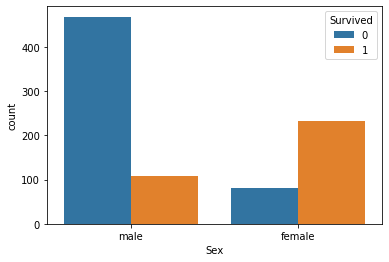

In [6]:
gender_surv_histo = sns.countplot(x='Sex', hue='Survived', data=df)

And survivability based on Passenger class -

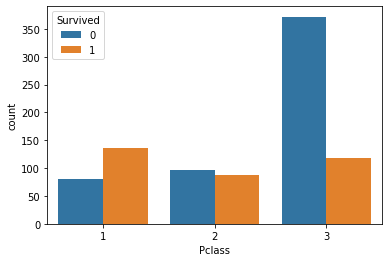

In [7]:
pclass_histo = sns.countplot(x='Pclass', hue='Survived', data=df)

## Data Cleaning
Let's fill in the missing data points with the average age for the age column. 
Also, we can drop the Cabin column and the 2 rows that have 'Emkarked' value missing. 

In [8]:
data = df.copy()

In [9]:
data['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
data = data.drop(['Cabin'],axis=1)

In [11]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Douglas, Mr. Walter Donald",male,NaN,NaN,NaN,1601,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


Having filled the missing Age data points with the average age(around 29.69) and having removed Cabin column, we see that now all features have 891 data points except embarked, which has 889. This can also be seen in a clean fashion using -

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Since 2 is a very small number compared to 891 (<1%), we can safely remove the entire 2 rows where value of 'Embarked' is missing. The question asks us to do the same.

In [13]:
data_no_null = data.dropna(axis=0)

In [14]:
data_no_null.isnull().sum() # Reconfirming that there's no null in any of the features

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
data_no_null.describe(include='all') #All features have a count of 889 items and no nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889,889.000000,889.000000,889.000000,889,889.000000,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,3
top,NaN,NaN,NaN,"Douglas, Mr. Walter Donald",male,NaN,NaN,NaN,CA. 2343,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.382452,2.311586,NaN,NaN,29.653446,0.524184,0.382452,NaN,32.096681,NaN
std,256.998173,0.486260,0.834700,NaN,NaN,12.968366,1.103705,0.806761,NaN,49.697504,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,224.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [16]:
temp_data = data_no_null.copy()

We can easily create dummies for the "Sex" and "Embarked" features since they have only 2 and 3 unique values respectively. But we'll have to deal with the "Name" feature differently, since all names being different, we have 889 unique items and creating dummies for all (889 items, i.e. 888 variables) is not a good practice. Good news is that we're having prefixes attached to all names and using them, we can club similar people into same categories. For example: Captain, Colonel, Major are military positions and their location, chances of survival etc can be used to classify them in one category.

In [17]:
temp_data['Prefix'] = temp_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
temp_data['Prefix'].describe()

count     889
unique     17
top        Mr
freq      517
Name: Prefix, dtype: object

Let's take a look at these prefixes

In [18]:
temp_data.Prefix.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Now we can categorize the prefixes in somewhat similar categories -

In [19]:
prefix_categories = {
    "Mr"          :"Mr",
    "Master"      :"Mr",
    "Sir"         :"Mr",
    "Mrs"         :"Mrs",
    "Ms"          :"Ms",
    "Miss"        :"Ms",
    "Mme"         :"Ms",
    "Mlle"        :"Ms",
    "Lady"        :"Ms",
    "Capt"        :"Military",
    "Col"         :"Military",
    "Major"       :"Military",
    "Jonkheer"    :"Royalty",
    "Don"         :"Royalty",
    "the Countess":"Royalty",
    "Dona"        :"Royalty",
    "Dr"          :"Dr",
    "Rev"         :"Rev",
}
temp_data.Prefix = temp_data.Prefix.map(prefix_categories)

Let's create dummies

In [20]:
data_with_dummies = pd.get_dummies(temp_data, columns=['Sex', 'Embarked', 'Prefix'], drop_first = True)

In [21]:
data_with_dummies

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Prefix_Military,Prefix_Mr,Prefix_Mrs,Prefix_Ms,Prefix_Rev,Prefix_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,1,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,1,0,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,1,0,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,0,0,1,0,0,0,0


Now having taken care of names using "Prefix", we can drop the 'Name' feature. Also, the 'Ticket' feature has 680 unique values, and at a quick glance doesn't seem to provide much valuable information. So, to simplify calculations we will drop that as well.

In [22]:
data_with_dummies = data_with_dummies.drop(['Name'],axis=1)
data_with_dummies = data_with_dummies.drop(['Ticket'],axis=1)

In [23]:
final_data = data_with_dummies.copy()

I have been creating copies of the dataframes after each change because I find it to be a good practice to keep checkpoints on your operations and not perform all operations on one dataframe, just in case you want to go back and try something else. This also makes it easier to compare performance between different methods.

# Logistic Regression Model
## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X = final_data.drop('Survived',axis=1)
y = final_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training and Predicting

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Evaluation

We'll check precision, recall, f1-score, using the classification report from sklearn.metrics.

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       171
           1       0.74      0.70      0.72        96

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: ",precision_score(y_true=y_test,y_pred=y_pred))
print("Recall: ",recall_score(y_true=y_test,y_pred=y_pred))
print("f1 Score: ",f1_score(y_true=y_test,y_pred=y_pred))

Precision:  0.7362637362637363
Recall:  0.6979166666666666
f1 Score:  0.716577540106952


# Support Vector Machines

## Train a Support Vector Classifier

In [40]:
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[165   6]
 [ 94   2]]


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       171
           1       0.25      0.02      0.04        96

    accuracy                           0.63       267
   macro avg       0.44      0.49      0.40       267
weighted avg       0.50      0.63      0.51       267



In [30]:
print("Precision: ",precision_score(y_true=y_test,y_pred=predictions))
print("Recall: ",recall_score(y_true=y_test,y_pred=predictions))
print("f1 Score: ",f1_score(y_true=y_test,y_pred=predictions))

Precision:  0.25
Recall:  0.020833333333333332
f1 Score:  0.038461538461538464


## Gridsearch
Using GridSearch to find the optimal values of C and gamma. 

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = { 'C': [100000, 1000000], 'gamma': [0.00001, 0.000001]}

model_svc = GridSearchCV( SVC(), parameters, refit=True, verbose=1)

model_svc.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100000, 1000000], 'gamma': [1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [32]:
y_pred_grid = model_svc.predict(X_test)

We can also take a look at the what were found to be the best GridSearchCV paramters while gridsearch was optimizing the hyperparamteres - 

In [33]:
print(model_svc.best_params_)

{'C': 1000000, 'gamma': 1e-06}


## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score.

In [34]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       171
           1       0.77      0.71      0.74        96

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



In [35]:
print("Precision: ",precision_score(y_true=y_test, y_pred=y_pred_grid))
print("Recall: ",recall_score(y_true=y_test, y_pred=y_pred_grid))
print("f1 Score: ",f1_score(y_true=y_test, y_pred=y_pred_grid))

Precision:  0.7727272727272727
Recall:  0.7083333333333334
f1 Score:  0.7391304347826088


Comparing the performance of Logistic Regression and SVC (without gridsearch optimization), Logistic Regression seems to be performing better, especially when it comes to Recall and F1-Score. 
After gridsearch optimization on the Support Vector Classifier, both the models seem to be performing fairly similar on the given dataset. The SVC visibly benefits a lot from the gridseacrh optimization.
I also tried testing on various splits and for many, SVM with GridSearch Optimization seemed to perform the best nearing more than 80% Accuracy and Precision consistently. Logistic Regression also touched 80% often.

One reason why SVC can perform better than Logistic Regression is that their might be some multicollinearity between the features, which if unchecked, can negatively impact Logistic Regression's performance. With SVMs, it's not that important.

Moreover, Logistic Regression is not very good at handling outliers. LR will tend to skew the probability functions for labels. Standardization thus becomes important for LR to ensure that some features' weights don't overshadow others. 
Whereas, SVMs can handle outliers well, as outliers may not intervene with the maximum margin distance. It only cares about the points closest to the decision boundary.

## Decision Trees implemented with AdaBoost 

In [38]:
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self,n_estimators):
        self.n_estimators = n_estimators
        self.models = [None]*n_estimators
        self.err_list = []
        
    def fit(self,X,y):
        num_items = len(y)
        w = np.array([1/num_items for i in range(num_items)])
        X = np.float64(X)
        
        for m in range(self.n_estimators):
            DTC = DecisionTreeClassifier(max_depth=1).fit(X,y,sample_weight=w).predict         
            
            errM = sum([w[i]* eq(y[i] != DTC(X[i].reshape(1,-1))) for i in range(num_items)])/sum(w)
            alpha = np.log((1-errM)/errM)
            
            # Updating the weights
            w = [w[i]*np.exp(alpha* eq(y[i] != DTC(X[i].reshape(1,-1)))) for i in range(num_items)] 
            
            self.err_list.append(1-errM)
            self.models[m] = (alpha, DTC)
            
    def errors(self):
        return self.err_list

    def predict(self,X):
        y = 0
        for m in range(self.n_estimators):
            alpha, DTC = self.models[m]
            y += alpha* DTC(X)
        targets = np.vectorize(target)
        y = np.where(targets(y)==-1,-1,1)
        return y
    
def eq(tru):
    return 1 if tru else 0

def target(x):
    return abs(x)/x if x!=0 else 1

In [55]:
y_train_tree = y_train.to_frame()
y_test_tree = y_test.to_frame()

In [57]:
y_train_tree['Survived'].replace(to_replace=0, value=-1, inplace=True)
y_test_tree['Survived'].replace(to_replace=0, value=-1, inplace=True)

In [59]:
clf = AdaBoost(n_estimators=500)
clf.fit(X_train.values,y_train_tree.values)

In [66]:
y_pred = clf.predict(X_test.values)

print("Confusion Matrix:\n",confusion_matrix(y_test_tree,y_pred))
print(classification_report(y_test_tree,y_pred))

Confusion Matrix:
 [[141  30]
 [ 24  72]]
              precision    recall  f1-score   support

          -1       0.85      0.82      0.84       171
           1       0.71      0.75      0.73        96

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.80      0.80       267



### Accuracy

Logistic Regression: 80%

SVC (after GridSearch): 82%

Decision Trees (with AdaBoost): 80%